In [4]:
import cv2

# load the image
img = cv2.imread('/content/seb2.jpg')
img2=cv2.imread('/content/sei.jpg')
stretch_near = cv2.resize(img, (500, 500),interpolation = cv2.INTER_LINEAR)
stretch_near2 = cv2.resize(img2, (500, 500),interpolation = cv2.INTER_LINEAR)
# check if the image is loaded correctly
if img is not None:
    # convert the image to grayscale
    gray = cv2.cvtColor(stretch_near, cv2.COLOR_BGR2GRAY)
    gray2=cv2.cvtColor(stretch_near2,cv2.COLOR_BGR2GRAY)
    
    # show the processed image
    #cv2.imshow('Processed Image',gray2 )
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
else:
    print('Error: Could not load image')


In [5]:
from google.colab.patches import cv2_imshow

(500, 500, 3)


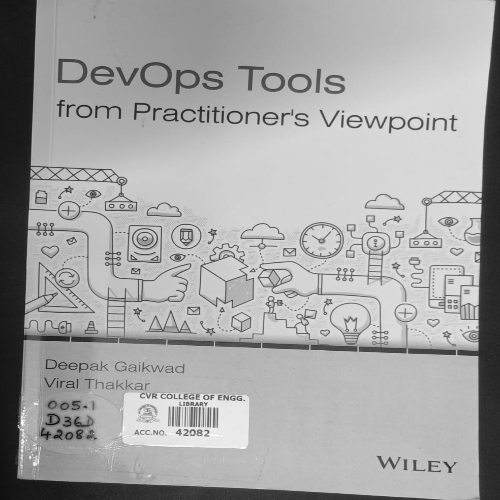

In [6]:
dim=stretch_near2.shape
print(dim)
cv2_imshow(gray2)

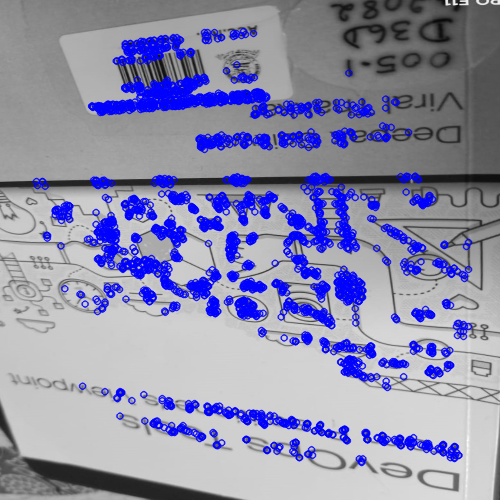

In [7]:
import cv2

# Load an image
img = cv2.imread('/content/seb2.jpg')

gray = cv2.cvtColor(stretch_near, cv2.COLOR_BGR2GRAY)
# Initialize the ORB detector
orb = cv2.ORB_create(3000)

# Detect keypoints and compute descriptors
kp, des = orb.detectAndCompute(gray, None)

# Draw keypoints on the image
img_keypoints = cv2.drawKeypoints(gray, kp, None, color=(255,0, 0), flags=0)

# Display the result
cv2_imshow(img_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

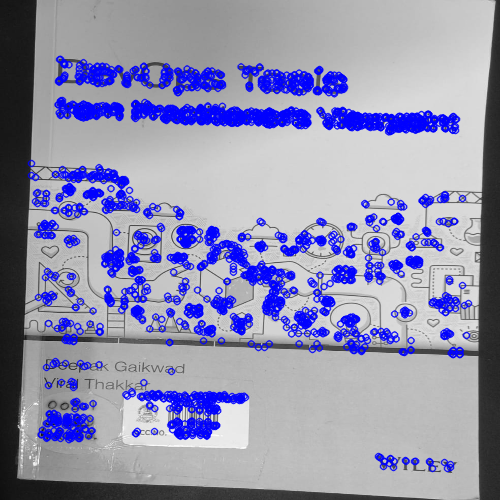

In [8]:
import cv2

# Load an image
#img2 = cv2.imread('booki')

#gray2 = cv2.cvtColor(stretch_near2, cv2.COLOR_BGR2GRAY)
# Initialize the ORB detector
orb = cv2.ORB_create(3000)

# Detect keypoints and compute descriptors
kp2, des2 = orb.detectAndCompute(gray2, None)

# Draw keypoints on the image
img_keypoints2 = cv2.drawKeypoints(gray2, kp2, None, color=(255,0, 0), flags=0)

# Display the result
cv2_imshow(img_keypoints2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
#match the above keypoints using bruteforce matcher
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches=bf.match(des,des2)
matches=sorted(matches,key=lambda i:i.distance)


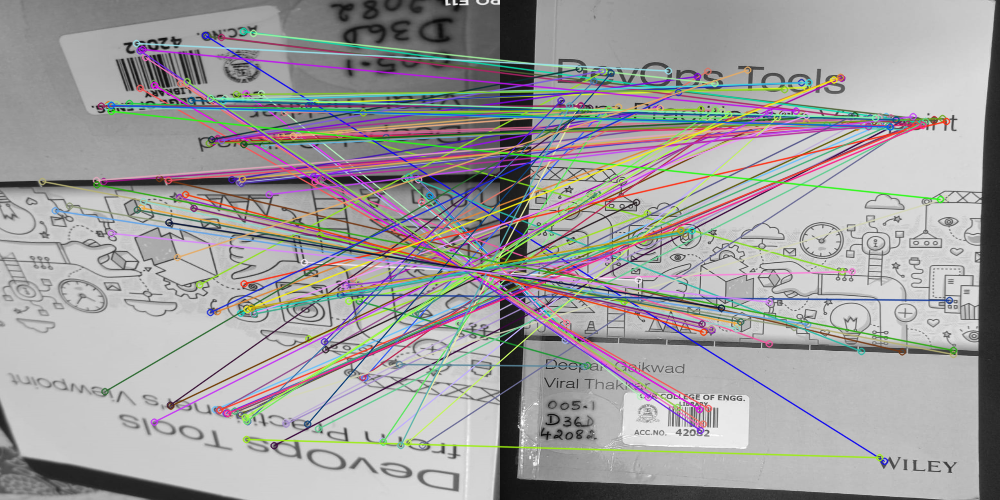

In [10]:
img3=cv2.drawMatches(gray,kp,gray2,kp2,matches[:150],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2_imshow(img3)

In [12]:

stretch_near5 = cv2.resize(3, (500, 500),interpolation = cv2.INTER_LINEAR)
dim3=stretch_near5.shape
print(dim3)

(500, 500)


[[-4.85578810e-01 -1.33622427e-02  2.77420378e+02]
 [ 2.07589478e-01 -1.05958765e+00  4.70698248e+02]
 [ 6.86322657e-04 -1.10817576e-03  1.00000000e+00]]


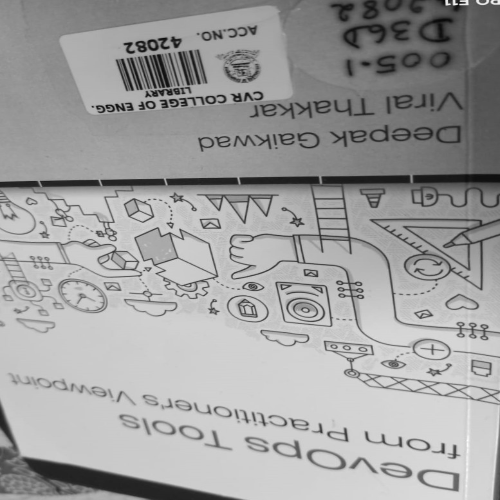

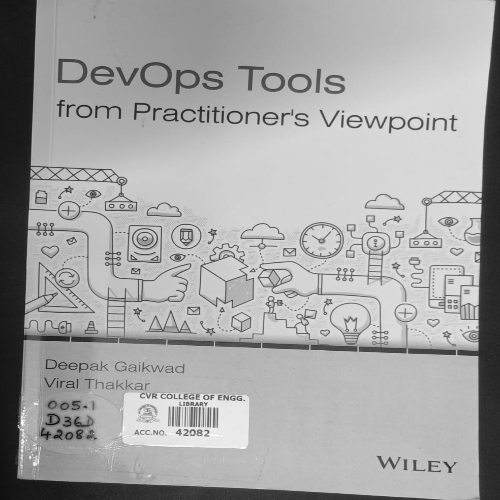

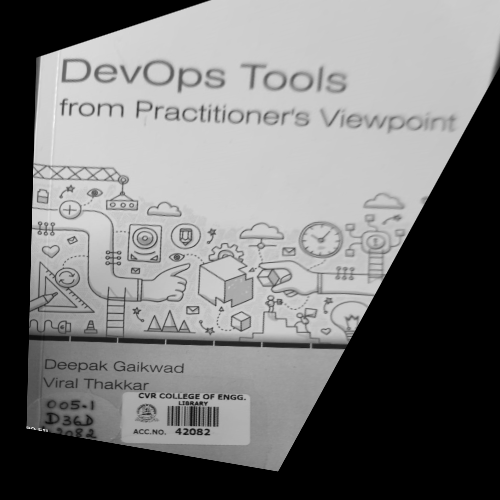

In [13]:
good_matches = matches[:150]  # Choose top 50 matches
import numpy as np
# Extract source and destination points
src_pts = np.float32([kp[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

#print(src_pts)
#print(src_pts.shape)
# Find homography matrix
H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
print(H)
height, width =gray.shape
aligned_img = cv2.warpPerspective(gray, H, (width, height))

# Display images
cv2_imshow(gray)
cv2_imshow(gray2)
cv2_imshow(aligned_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# orb

In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read image 
img1 = cv2.imread('/content/seb2.jpg')
img2 = cv2.imread('/content/sei.jpg') 

# Initiate ORB detector
orb = cv2.ORB_create()

# Convering to Gray
img1= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# no.of keypoints 
print(len(des1))
print(len(des2))

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Create images with keypoints
img1=cv2.drawKeypoints(img1,kp1,img1)
cv2.imwrite('2orb_keypoints.jpg',img1)

img2=cv2.drawKeypoints(img2,kp2,img2)
cv2.imwrite('3orb_keypoints.jpg',img2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

print("matches ")
print(len(good))

500
500
matches 
13


# sift


In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read image 
img1 = cv2.imread('/content/seb2.jpg')
img2 = cv2.imread('/content/sei.jpg') 

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# Convering to Gray
img1= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# no.of keypoints 
print(len(des1))
print(len(des2))

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Create images with keypoints
img1=cv2.drawKeypoints(img1,kp1,img1)
cv2.imwrite('2sift_keypoints.jpg',img1)

img2=cv2.drawKeypoints(img2,kp2,img2)
cv2.imwrite('3sift_keypoints.jpg',img2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

print("matches ")
print(len(good))

4132
5911
matches 
750


4858
5911
812
[[-6.31636346e-01 -4.38446561e-02  6.43028033e+02]
 [ 3.62702382e-01 -1.11826776e+00  1.15904718e+03]
 [ 4.63024884e-04 -4.83811368e-04  1.00000000e+00]]


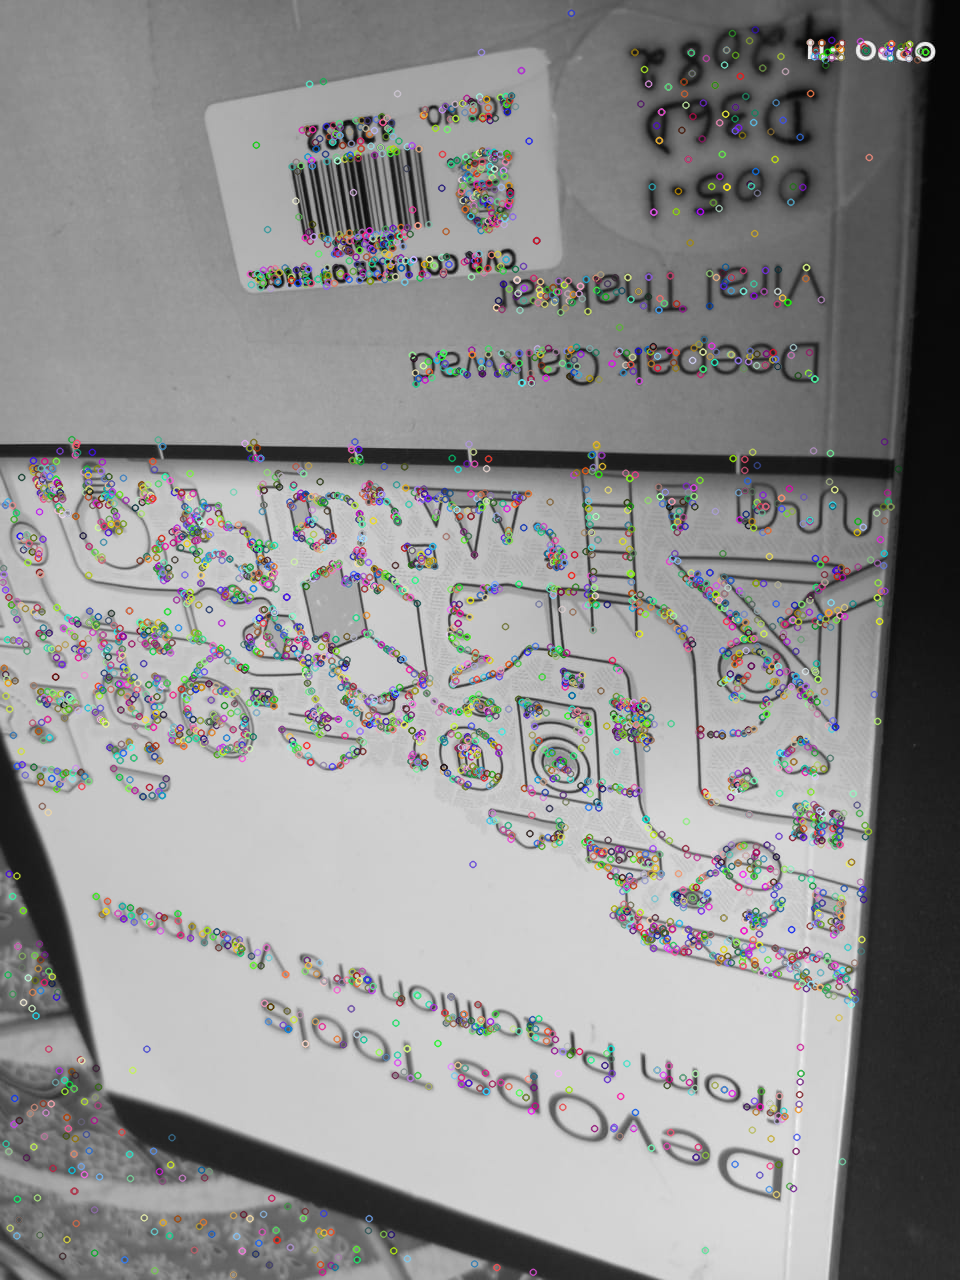

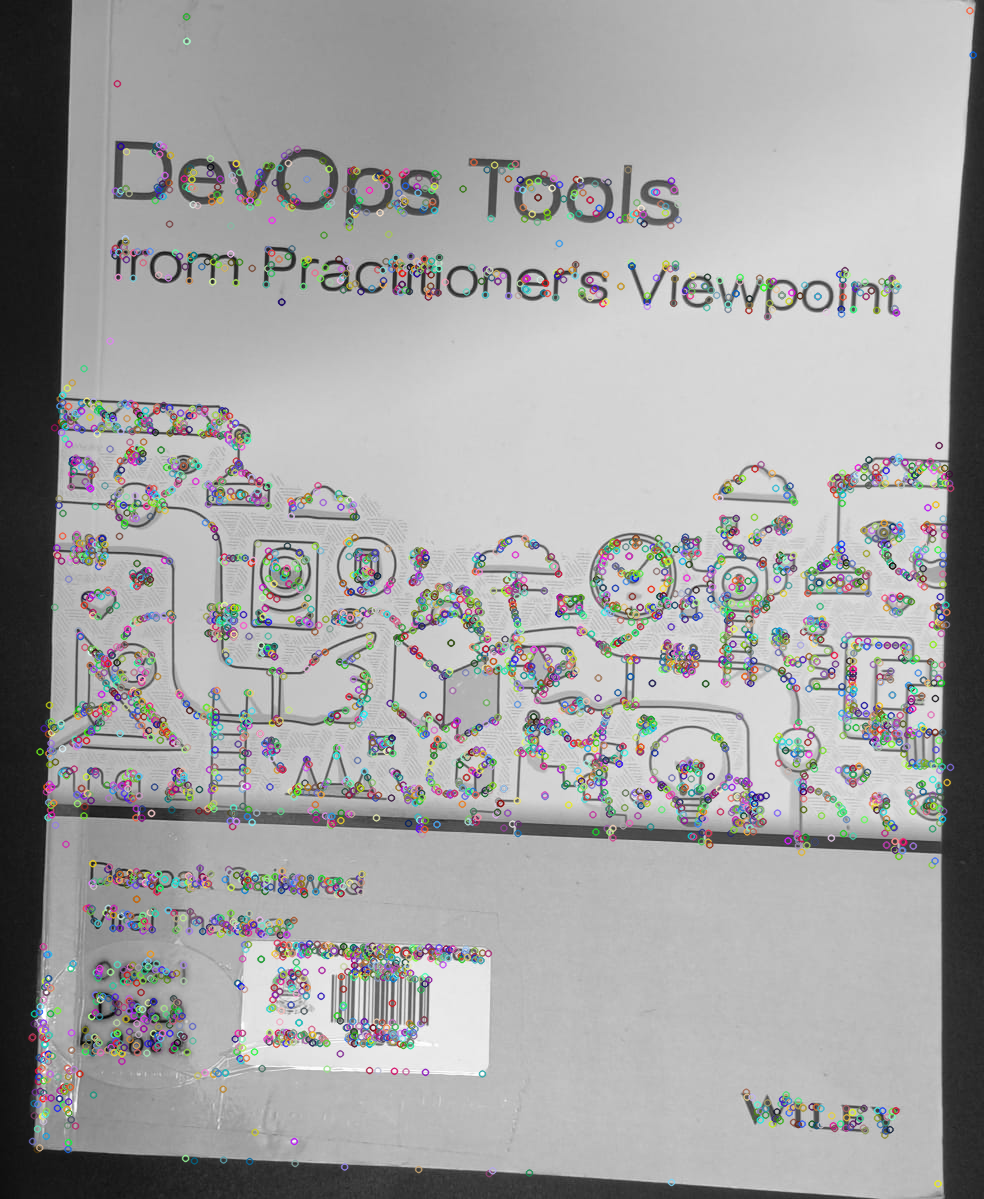

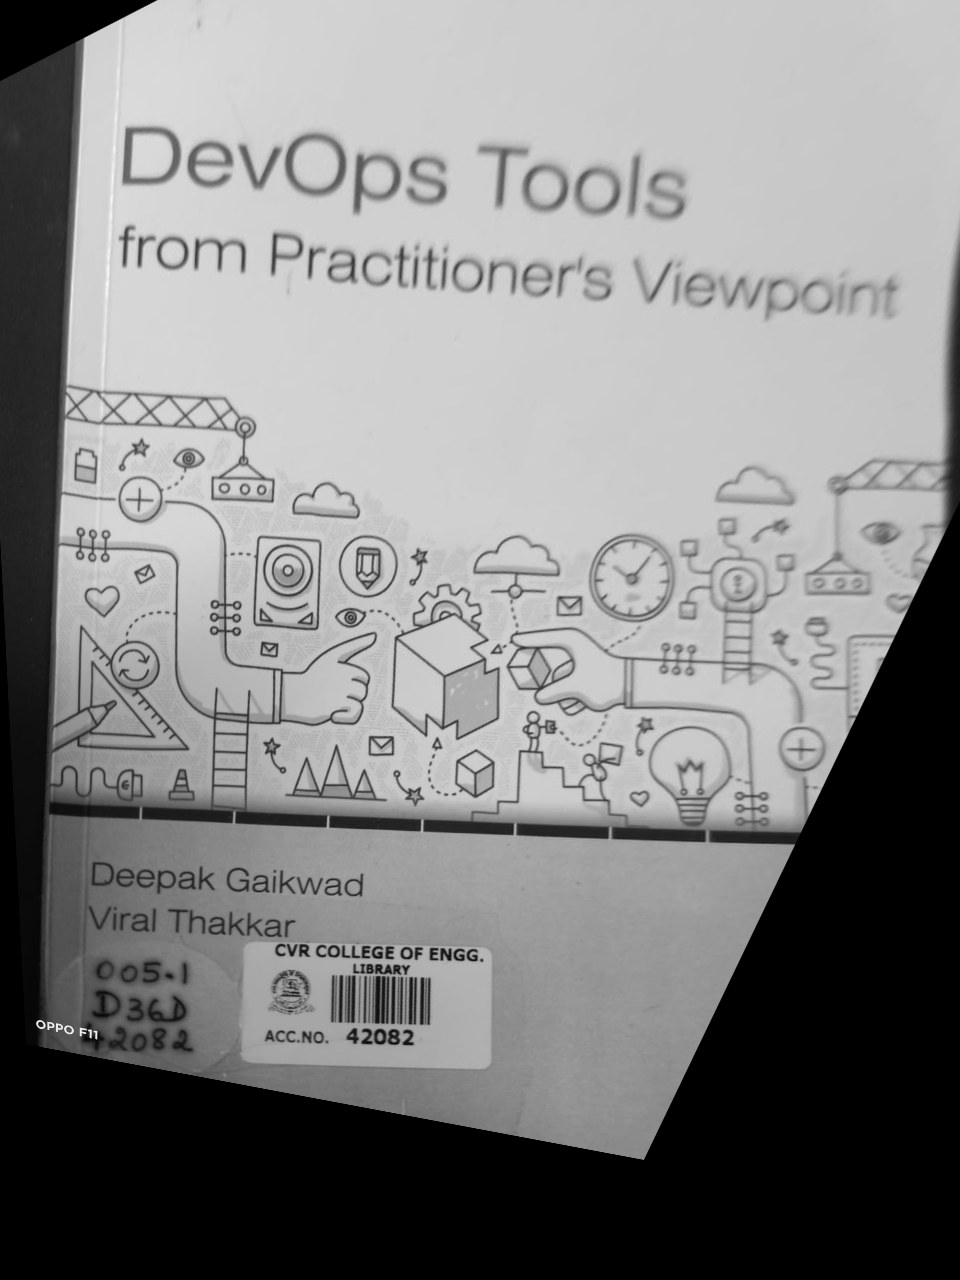

In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('/content/seb.jpg') # queryImage
img2 = cv2.imread('/content/sei.jpg') # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# Converting to grayscale
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# no. of keypoints
print(len(des1))
print(len(des2))

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Create images with keypoints
img1_kp = cv2.drawKeypoints(img1, kp1, img1)
cv2.imwrite('2sift_keypoints.jpg', img1_kp)

img2_kp = cv2.drawKeypoints(img2, kp2, img2)
cv2.imwrite('3sift_keypoints.jpg', img2_kp)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

print(len(good_matches))
good_matches = good_matches[:500]  # Choose top 500 matches

# Extract source and destination points
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Find homography matrix
H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
print(H)

# Get the dimensions of the input image
height, width = img1.shape[:2]

# Warp the input image
aligned_img = cv2.warpPerspective(img1, H, (width, height))

# Display images
cv2_imshow(img1_kp)
cv2_imshow(img2_kp)
cv2_imshow(aligned_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [17]:
re= cv2.resize(aligned_img, (500, 500),interpolation = cv2.INTER_LINEAR)
dim=re.shape
print(dim)

(500, 500)


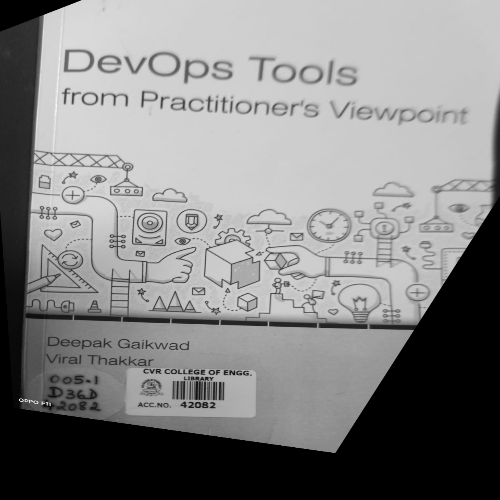

In [18]:
cv2_imshow(re)